# Data Exploration

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

## a)

In [2]:
df = pd.read_csv('insurance_orig.csv')
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1349
Number of columns: 7


## b)

In [3]:
df.describe()

,age,bmi,children,charges
count,1348.000000,1347.000000,1348.000000,1347.000000
mean,39.228487,30.655499,1.103858,13254.716622
std,14.063585,6.085427,1.217132,12096.109347
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4742.306100
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.637500,2.000000,16582.138605
max,64.000000,53.130000,7.000000,63770.428010


## c)

In [4]:
# drop out all the rows with NaN values
df_new = df.dropna()
print("Number of rows without NaN values:", df_new.shape[0])

Number of rows without NaN values: 1338


## d)

In [5]:
# function to distinguish MBI into classes
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Introduce a new feature "bmi_class"
df_new = df_new.copy()
df_new["bmi_class"] = df_new["bmi"].apply(classify_bmi)

# Count number of patients in each BMI class
bmi_counts = df_new["bmi_class"].value_counts()
print("Number of patients in each BMI class:", bmi_counts)

Number of patients in each BMI class: bmi_class
Obese            707
Overweight       386
Normal weight    225
Underweight       20
Name: count, dtype: int64


## e)

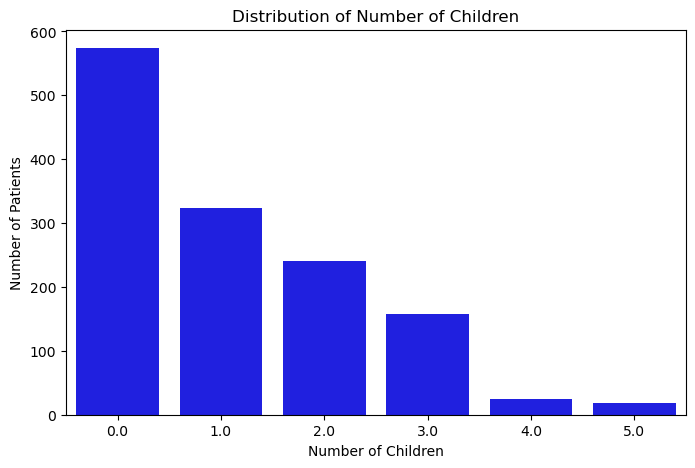

Mode of the 'children' feature: 0.0


In [6]:
import matplotlib.pyplot as plt

# Plot distribution of "children" using a countplot from library Seaborn
plt.figure(figsize=(8,5))
sns.countplot(x="children", data=df_new, color="blue")
plt.title("Distribution of Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Number of Patients")
plt.show()

# State the mode of the "children" feature
mode_children = df_new["children"].mode()[0]
print("Mode of the 'children' feature:", mode_children)

## f)

Number of bins used: 36


E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

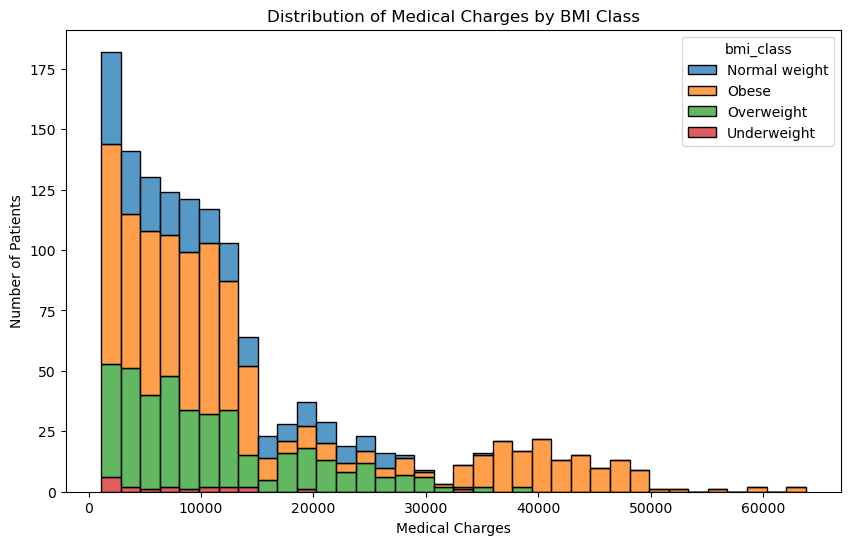

In [7]:
import math

# Determine a good number of bins using the square root method
num_bins = int(math.sqrt(df_new.shape[0]))
print("Number of bins used:", num_bins)

# Create histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df_new, x="charges", hue="bmi_class", bins=num_bins, multiple="stack")
plt.title("Distribution of Medical Charges by BMI Class")
plt.xlabel("Medical Charges")
plt.ylabel("Number of Patients")
plt.show()

## g)

In [8]:
# The recognized trends are in the report

## h)

E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
E:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

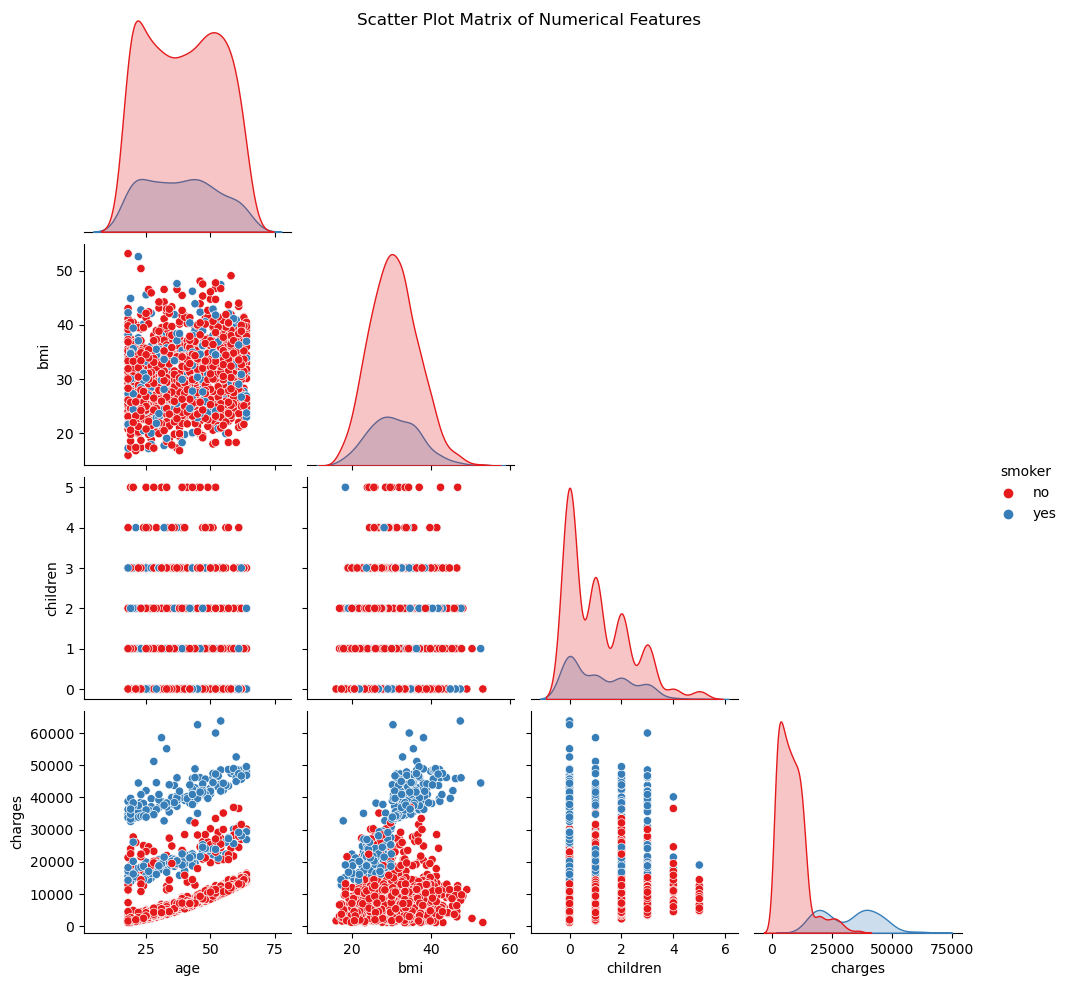

In [9]:
numerical_features = ['age', 'bmi', 'children', 'charges']

# Create pairplot with "smoker" as hue
sns.pairplot(df_new[numerical_features + ['smoker']], hue='smoker', palette='Set1', corner=True)
plt.suptitle("Scatter Plot Matrix of Numerical Features")
plt.show()

## i)

In [10]:
# Compute and display correlation matrix
corr_matrix = df_new[numerical_features].corr()
print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
                age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


## j)

In [11]:
# The answers are in the report